In [2]:
import cv2

In [54]:
our_image=cv2.imread(r"C:\Users\santr\PycharmProjects\MINIPROJECT\RESOURCES\masked elon.jpg")

In [55]:
our_image.shape

(900, 1600, 3)

In [38]:
import matplotlib.pyplot as plt

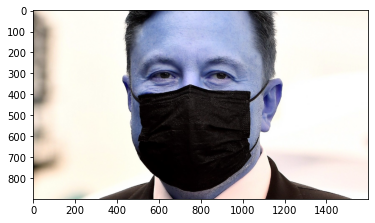

In [57]:
plt.imshow(our_image)

In [58]:
while True:
    cv2.imshow("OUTPUT IMAGE",our_image)
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
cv2.destroyAllWindows()

In [59]:
import numpy as np
kernel = np.ones((5,5),np.uint8)
our_img_gray=cv2.cvtColor(our_image,cv2.COLOR_BGR2GRAY) #for gray scaling the image
while True:
    cv2.imshow("OUTPUT grey IMAGE",our_img_gray)
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
cv2.destroyAllWindows()

In [60]:
faceCascade=cv2.CascadeClassifier(r"C:\Users\santr\Downloads\haarcascade_frontalface_default.xml")

In [61]:
faceCascade.detectMultiScale(img)

array([[482, 105,  77,  77]])

In [74]:
video_cap = cv2.VideoCapture(0)
data = []
while True:
    success, our_img = video_cap.read()
    if success:
        faces = faceCascade.detectMultiScale(our_img, 1.1, 4)
        for (x, y, w, h) in faces:
            cv2.rectangle(our_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_image=our_img[y:y+h, x:x+w, :]
            face_image=cv2.resize(face_image,(50,50))
            if len(face_image)<400:
                data.append(face_image)

        cv2.imshow("Resultant", our_img)
        if cv2.waitKey(1) & 0xFF == ord('q') or len(data)>200:
            break
cv2.destroyAllWindows()
video_cap.release()


In [63]:
np.save("without mask.npy",data)

In [75]:
np.save("with mask.npy",data)

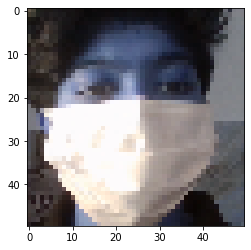

In [85]:
plt.imshow(data[70])

In [6]:
import numpy as np
with_mask=np.load('with mask.npy')
without_mask=np.load('without mask.npy')

In [7]:
with_mask.shape

(201, 50, 50, 3)

In [8]:
without_mask.shape

(201, 50, 50, 3)

In [9]:
#lets convert 4 dimension to 2 dimension
with_mask=with_mask.reshape(201,50*50*3)
without_mask=with_mask.reshape(201,50*50*3)

In [10]:
with_mask.shape

(201, 7500)

In [11]:
without_mask.shape

(201, 7500)

In [12]:
#combining data such that first 201=with mask and then without
x=np.r_[with_mask,without_mask]
x.shape

(402, 7500)

In [13]:
y = np.zeros(x.shape[0])
y[200:]=1.0

In [14]:
LABELS= {0:'MASK DETECTED',1:'NO MASK DETECTED'}

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y,test_size=0.2, stratify=y, random_state=52)

In [17]:
x_train.shape

(321, 7500)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
#we need dimensionality reduction since the columns=7500
from sklearn.decomposition import PCA

In [20]:
p=PCA(n_components=3)
x_train=p.fit_transform(x_train)
x_train[0]

array([ -4.51300318, -25.84044898,  -3.83813968])

In [21]:
x_train.shape

(321, 3)

In [22]:
svm_linear=SVC(kernel="linear")
#model fitting
svm_linear.fit(x_train,y_train)
svm_pred = svm_linear.predict(x_test)


ValueError: X.shape[1] = 7500 should be equal to 3, the number of features at training time

# this error occured because the dimenionality of x_test is 75000
# we used pca on x_train and converted it to a dimension of 3
# we will be using the same technique here


In [23]:
x_test=p.fit_transform(x_test)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
svm_linear=SVC(kernel="linear")
#model fitting
svm_linear.fit(x_train,y_train)
svm_pred = svm_linear.predict(x_test)

In [26]:
svm_accuracy=accuracy_score(y_test,svm_pred)
print("accuracy score:",svm_accuracy)


accuracy score: 0.49382716049382713


In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix:\n")
confusion_matrix(y_test,svm_pred)
print(confusion_matrix(y_test, svm_pred))

confusion matrix:

[[ 0 40]
 [ 1 40]]


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y,test_size=0.2, stratify=y, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [32]:
from sklearn.decomposition import PCA
p=PCA(n_components=3)
x_train=p.fit_transform(x_train)
x_train[0]

array([-4.93737701,  7.50634188, -2.56112721])

In [33]:
x_test=p.fit_transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression

#  create model instance 
log= LogisticRegression()

#  Model Fitting
log = log.fit(x_train, y_train)

log_pred = log.predict(x_test)

log_accuracy=accuracy_score(y_test,log_pred)
print("accuracy score:",log_accuracy)

accuracy score: 0.4444444444444444


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\santr\AppData\Local\Temp/ipykernel_13220/1719044380.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  accuracy = pd.Series()


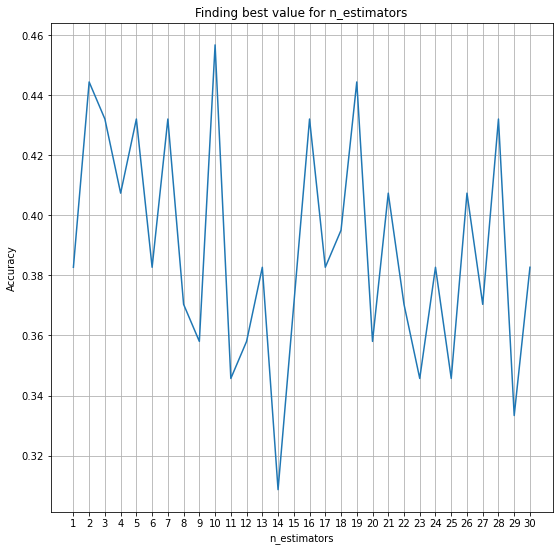

Highest accuracy:  0.4567901234567901


In [39]:
# Plotting a accuracy graph
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
X_axis = list(range(1, 31))
accuracy = pd.Series()

for i in X_axis:
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred= knn.predict(x_test)
    accuracy= accuracy.append(pd.Series(metrics.accuracy_score(pred,y_test)))
plt.figure(figsize=(9,9))
plt.plot(X_axis, accuracy)  
plt.xticks(range(1,31))
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()    
print('Highest accuracy: ',accuracy.values.max())

In [40]:
#  create model instance 
knn= KNeighborsClassifier(n_neighbors=10)

#  Model Fitting
knn=knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

# Model Accuracy
knn_accuracy=accuracy_score(y_test,knn_pred)
print("accuracy score:",knn_accuracy)

# confusion matrix
print("confusion matrix:\n")
confusion_matrix(y_test, knn_pred)
print(confusion_matrix(y_test,knn_pred))

#classification report for knn model
print("\nclassification report:\n")
print(classification_report(y_test,knn_pred ))

accuracy score: 0.4567901234567901
confusion matrix:

[[30 10]
 [34  7]]

classification report:

              precision    recall  f1-score   support

         0.0       0.47      0.75      0.58        40
         1.0       0.41      0.17      0.24        41

    accuracy                           0.46        81
   macro avg       0.44      0.46      0.41        81
weighted avg       0.44      0.46      0.41        81



In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Highest accuracy:  0.4567901234567901


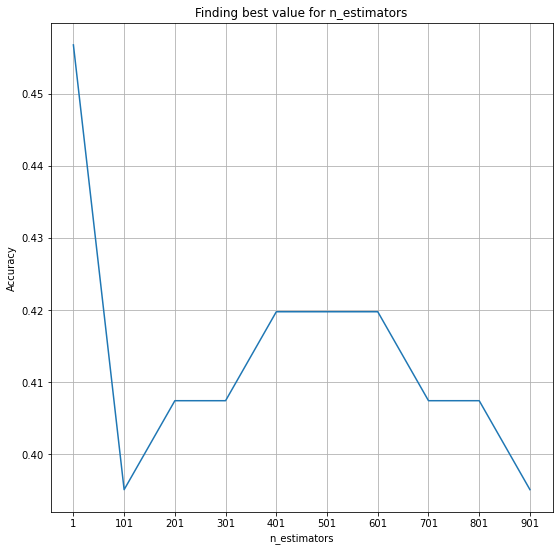

In [42]:
from sklearn.ensemble import RandomForestClassifier
accuracy=[]
x_axis=list(range(1,1000,100))
for i in range(1,1000,100):
    random = RandomForestClassifier(n_estimators = i, random_state = 0)
    random.fit(x_train,y_train)
    rf_pred =random.predict(x_test)
    accuracy.append(accuracy_score(y_test,rf_pred))

plt.figure(figsize=(9,9))
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(x_axis)
plt.grid()
plt.plot(x_axis, accuracy)    
print('Highest accuracy: ',max(accuracy))

In [43]:
#  create model instance 
random=RandomForestClassifier(n_estimators = 1)

#  Model Fitting
random.fit(x_train,y_train)

rf_pred =random.predict(x_test)

# Model Accuracy
rf_accuracy=accuracy_score(y_test,rf_pred)
print("accuracy score:",rf_accuracy)

# confusion matrix
print("confusion matrix:\n")
confusion_matrix(y_test, rf_pred )
print(confusion_matrix(y_test, rf_pred ))

#classification report for random forest model
print("\nclassification report:\n")
print(classification_report(y_test,rf_pred ))

accuracy score: 0.5925925925925926
confusion matrix:

[[26 14]
 [19 22]]

classification report:

              precision    recall  f1-score   support

         0.0       0.58      0.65      0.61        40
         1.0       0.61      0.54      0.57        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



In [44]:
from sklearn.naive_bayes import GaussianNB

#  create model instance 
nb=GaussianNB()

#  Model Fitting
nb.fit(x_train,y_train)

nb_pred =nb.predict(x_test)

# Model Accuracy
nb_accuracy=accuracy_score(y_test,nb_pred)
print("accuracy score:",nb_accuracy)

# confusion matrix
print("confusion matrix:\n")
confusion_matrix(y_test,nb_pred )
print(confusion_matrix(y_test, nb_pred))

#classification report for naive bayes model
print("\nclassification report:\n")
print(classification_report(y_test,nb_pred ))

accuracy score: 0.43209876543209874
confusion matrix:

[[31  9]
 [37  4]]

classification report:

              precision    recall  f1-score   support

         0.0       0.46      0.78      0.57        40
         1.0       0.31      0.10      0.15        41

    accuracy                           0.43        81
   macro avg       0.38      0.44      0.36        81
weighted avg       0.38      0.43      0.36        81



In [45]:
from sklearn.tree import DecisionTreeClassifier

#  create model instance 
dt=DecisionTreeClassifier(criterion="entropy")

#  Model Fitting
dt.fit(x_train,y_train)

dt_pred =dt.predict(x_test)

#accuraccy
dt_accuracy=accuracy_score(y_test,dt_pred)
print("accuracy score:",dt_accuracy)

# confusion matrix
print("confusion matrix:")
confusion_matrix(y_test,dt_pred )
print(confusion_matrix(y_test, dt_pred ))


#classification report for decision tree model
print("\nclassification report:\n")
print(classification_report(y_test,dt_pred ))

accuracy score: 0.48148148148148145
confusion matrix:
[[33  7]
 [35  6]]

classification report:

              precision    recall  f1-score   support

         0.0       0.49      0.82      0.61        40
         1.0       0.46      0.15      0.22        41

    accuracy                           0.48        81
   macro avg       0.47      0.49      0.42        81
weighted avg       0.47      0.48      0.41        81



In [46]:
#  create model instance
boost=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)

#  Model Fitting
boost.fit(x_train,y_train)

gb_pred=boost.predict(x_test)

#accuraccy
gb_accuracy=accuracy_score(y_test,gb_pred)
print("accuracy score:",gb_accuracy)

# confusion matrix
print("confusion matrix:")
confusion_matrix(y_test,gb_pred )
print(confusion_matrix(y_test, gb_pred ))

#classification report for gradient boosting model
print("\nclassification report:\n")
print(classification_report(y_test,gb_pred ))

accuracy score: 0.4691358024691358
confusion matrix:
[[18 22]
 [21 20]]

classification report:

              precision    recall  f1-score   support

         0.0       0.46      0.45      0.46        40
         1.0       0.48      0.49      0.48        41

    accuracy                           0.47        81
   macro avg       0.47      0.47      0.47        81
weighted avg       0.47      0.47      0.47        81



In [47]:
#  create model instance
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)

#  Model Fitting
adaboost.fit(x_train,y_train)

ada_pred=adaboost.predict(x_test)

#accuraccy
ada_accuracy=accuracy_score(y_test,ada_pred)
print("accuracy score:",ada_accuracy)

# confusion matrix
print("confusion matrix:")
confusion_matrix(y_test,ada_pred )
print(confusion_matrix(y_test, ada_pred ))

#classification report for adaboost model
print("\nclassification report:\n")
print(classification_report(y_test,ada_pred ))

accuracy score: 0.5061728395061729
confusion matrix:
[[19 21]
 [19 22]]

classification report:

              precision    recall  f1-score   support

         0.0       0.50      0.47      0.49        40
         1.0       0.51      0.54      0.52        41

    accuracy                           0.51        81
   macro avg       0.51      0.51      0.51        81
weighted avg       0.51      0.51      0.51        81



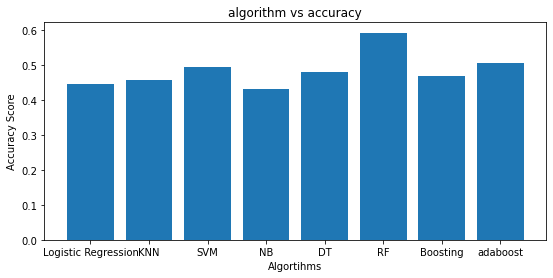

In [48]:
#Bar graph for accuracy comparison
ax=plt.figure(figsize=(9,4))
accuracy=[log_accuracy,knn_accuracy,svm_accuracy,nb_accuracy,dt_accuracy ,rf_accuracy,gb_accuracy,ada_accuracy]
plt.bar(['Logistic Regression','KNN','SVM','NB','DT','RF','Boosting','adaboost'],accuracy,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.title("algorithm vs accuracy")
plt.show()

In [60]:
faceCascade=cv2.CascadeClassifier(r"C:\Users\santr\Downloads\haarcascade_frontalface_default.xml")
video_cap = cv2.VideoCapture(0)
data = []
while True:
    success, img = video_cap.read()
    if success:
        faces = faceCascade.detectMultiScale(img, 1.1, 4)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_image=img[y:y+h, x:x+w, :]
            face_image=cv2.resize(face_image,(50,50))
            face_image=face_image.reshape(1,-1)
            face_image = p.transform(face_image)
            pred = random.predict(face_image)
            l = LABELS[int(pred)]
            print(l)
        cv2.imshow("Resultant", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cv2.destroyAllWindows()
video_cap.release()

MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED
MASK DETECTED


In [62]:
faceCascade=cv2.CascadeClassifier(r"C:\Users\santr\Downloads\haarcascade_frontalface_default.xml")
video_cap = cv2.VideoCapture(0)
data = []
while True:
    success, img = video_cap.read()
    if success:
        faces = faceCascade.detectMultiScale(img, 1.1, 4)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_image=img[y:y+h, x:x+w, :]
            face_image=cv2.resize(face_image,(50,50))
            face_image=face_image.reshape(1,-1)
            face_image = p.transform(face_image)
            pred = svm_linear.predict(face_image)
            l = LABELS[int(pred)]
            print(l)
        cv2.imshow("Resultant", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cv2.destroyAllWindows()
video_cap.release()

NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
NO MASK DETECTED
